Libraries

In [108]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Data

In [109]:
# Retrieve attribute names in order
attribute_names = list(np.load('../gen_train_data/data/output/attributes.npy', allow_pickle=True))

# Load test data
X_test_pre = np.load('../gen_train_data/data/output/pre/X_test_pre.npy', allow_pickle=True)
y_test_pre = np.load('../gen_train_data/data/output/pre/y_test_pre.npy', allow_pickle=True)
X_test_post = np.load('../gen_train_data/data/output/post/X_test_post.npy', allow_pickle=True)
y_test_post = np.load('../gen_train_data/data/output/post/y_test_post.npy', allow_pickle=True)

# Type conversion needed    
data_dic = {
    "X_test_pre": pd.DataFrame(X_test_pre, columns=attribute_names).convert_dtypes(),
    "y_test_pre": y_test_pre,
    "X_test_post": pd.DataFrame(X_test_post, columns=attribute_names).convert_dtypes(),
    "y_test_post": y_test_post,
}

In [110]:
method_names = {
    0: "ORIG",
    1: "ORIG_CW",
    2: "OVER",
    3: "UNDER"
}
model_choices = {
    "ORIG": "XGB",
    "ORIG_CW": "RF",
    "OVER": "XGB",
    "UNDER": "XGB"
}

soc_var_names = np.load('../EDA/soc_vars_names.npy', allow_pickle=True)
ind_var_names = np.load('../EDA/ind_vars_names.npy', allow_pickle=True)

SHAP Plots

In [ ]:
method_name = 'OVER'
plt.figure(figsize=(35, 75))
for i, group in enumerate(['pre', 'post']):
            X_test = data_dic['X_test_' + group]
            y_test = data_dic['y_test_' + group]
            model_name = model_choices[method_name]
            shap_vals = np.load(f'./output/shap_values/{group}_{method_name}.npy')
            ax = plt.subplot(2,1,i+1)
            shap.summary_plot(shap_vals, X_test, max_display=len(attribute_names), show=False)
            plt.title(group.upper(), fontsize = 12, fontweight='bold')
            plt.xlabel('SHAP Value')
            plt.xlim(-3,5)
            used_colors = {'purple': 'Social factor', 'green': 'Individual factor'}
            for label in ax.get_yticklabels():
                label_text = label.get_text()  # Get the text of the label
                label.set_fontsize(8)
                if label_text in soc_var_names:
                        label.set_color('purple')
                else:
                        label.set_color('green')
                # Create custom legend for each subplot
                handles = [mpatches.Patch(color=color, label=label) for color, label in used_colors.items()]
                ax.legend(handles=handles, loc='lower right', fontsize=8)
            
plt.suptitle(f'SHAP Summary Plots PRE vs POST - Pipeline: Oversampling - Model: {model_name}\n\n')
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.savefig(f'./output/plots/shap_summary/{method_name}_{model_name}.svg', format='svg', dpi=1250)
plt.show()

In [ ]:
method_name = 'ORIG_CW'
plt.figure(figsize=(35, 75))
for i, group in enumerate(['pre', 'post']):
            X_test = data_dic['X_test_' + group]
            y_test = data_dic['y_test_' + group]
            model_name = model_choices[method_name]
            shap_vals = np.load(f'./output/shap_values/{group}_{method_name}.npy')
            shap_vals = shap_vals[:,:,1] # Select shap values for positive class
            ax = plt.subplot(2,1,i+1)
            shap.summary_plot(shap_vals, X_test, max_display=len(attribute_names), show=False)
            plt.title(group.upper(), fontsize = 12, fontweight='bold')
            plt.xlabel('SHAP Value')
            plt.xlim(-0.5,0.5)
            used_colors = {'purple': 'Social factor', 'green': 'Individual factor'}
            for label in ax.get_yticklabels():
                label_text = label.get_text()  # Get the text of the label
                label.set_fontsize(8)
                if label_text in soc_var_names:
                        label.set_color('purple')
                else:
                        label.set_color('green')
                # Create custom legend for each subplot
                handles = [mpatches.Patch(color=color, label=label) for color, label in used_colors.items()]
                ax.legend(handles=handles, loc='lower right', fontsize=8)

plt.suptitle(f'SHAP Summary Plots PRE vs POST - Pipeline: Original with Class Weight - Model: {model_name}\n\n')
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.savefig(f'./output/plots/shap_summary/{method_name}_{model_name}.svg', format='svg', dpi=1250)
plt.show()

SHAP Interaction Plots

OVER

In [16]:
method_name = 'OVER'

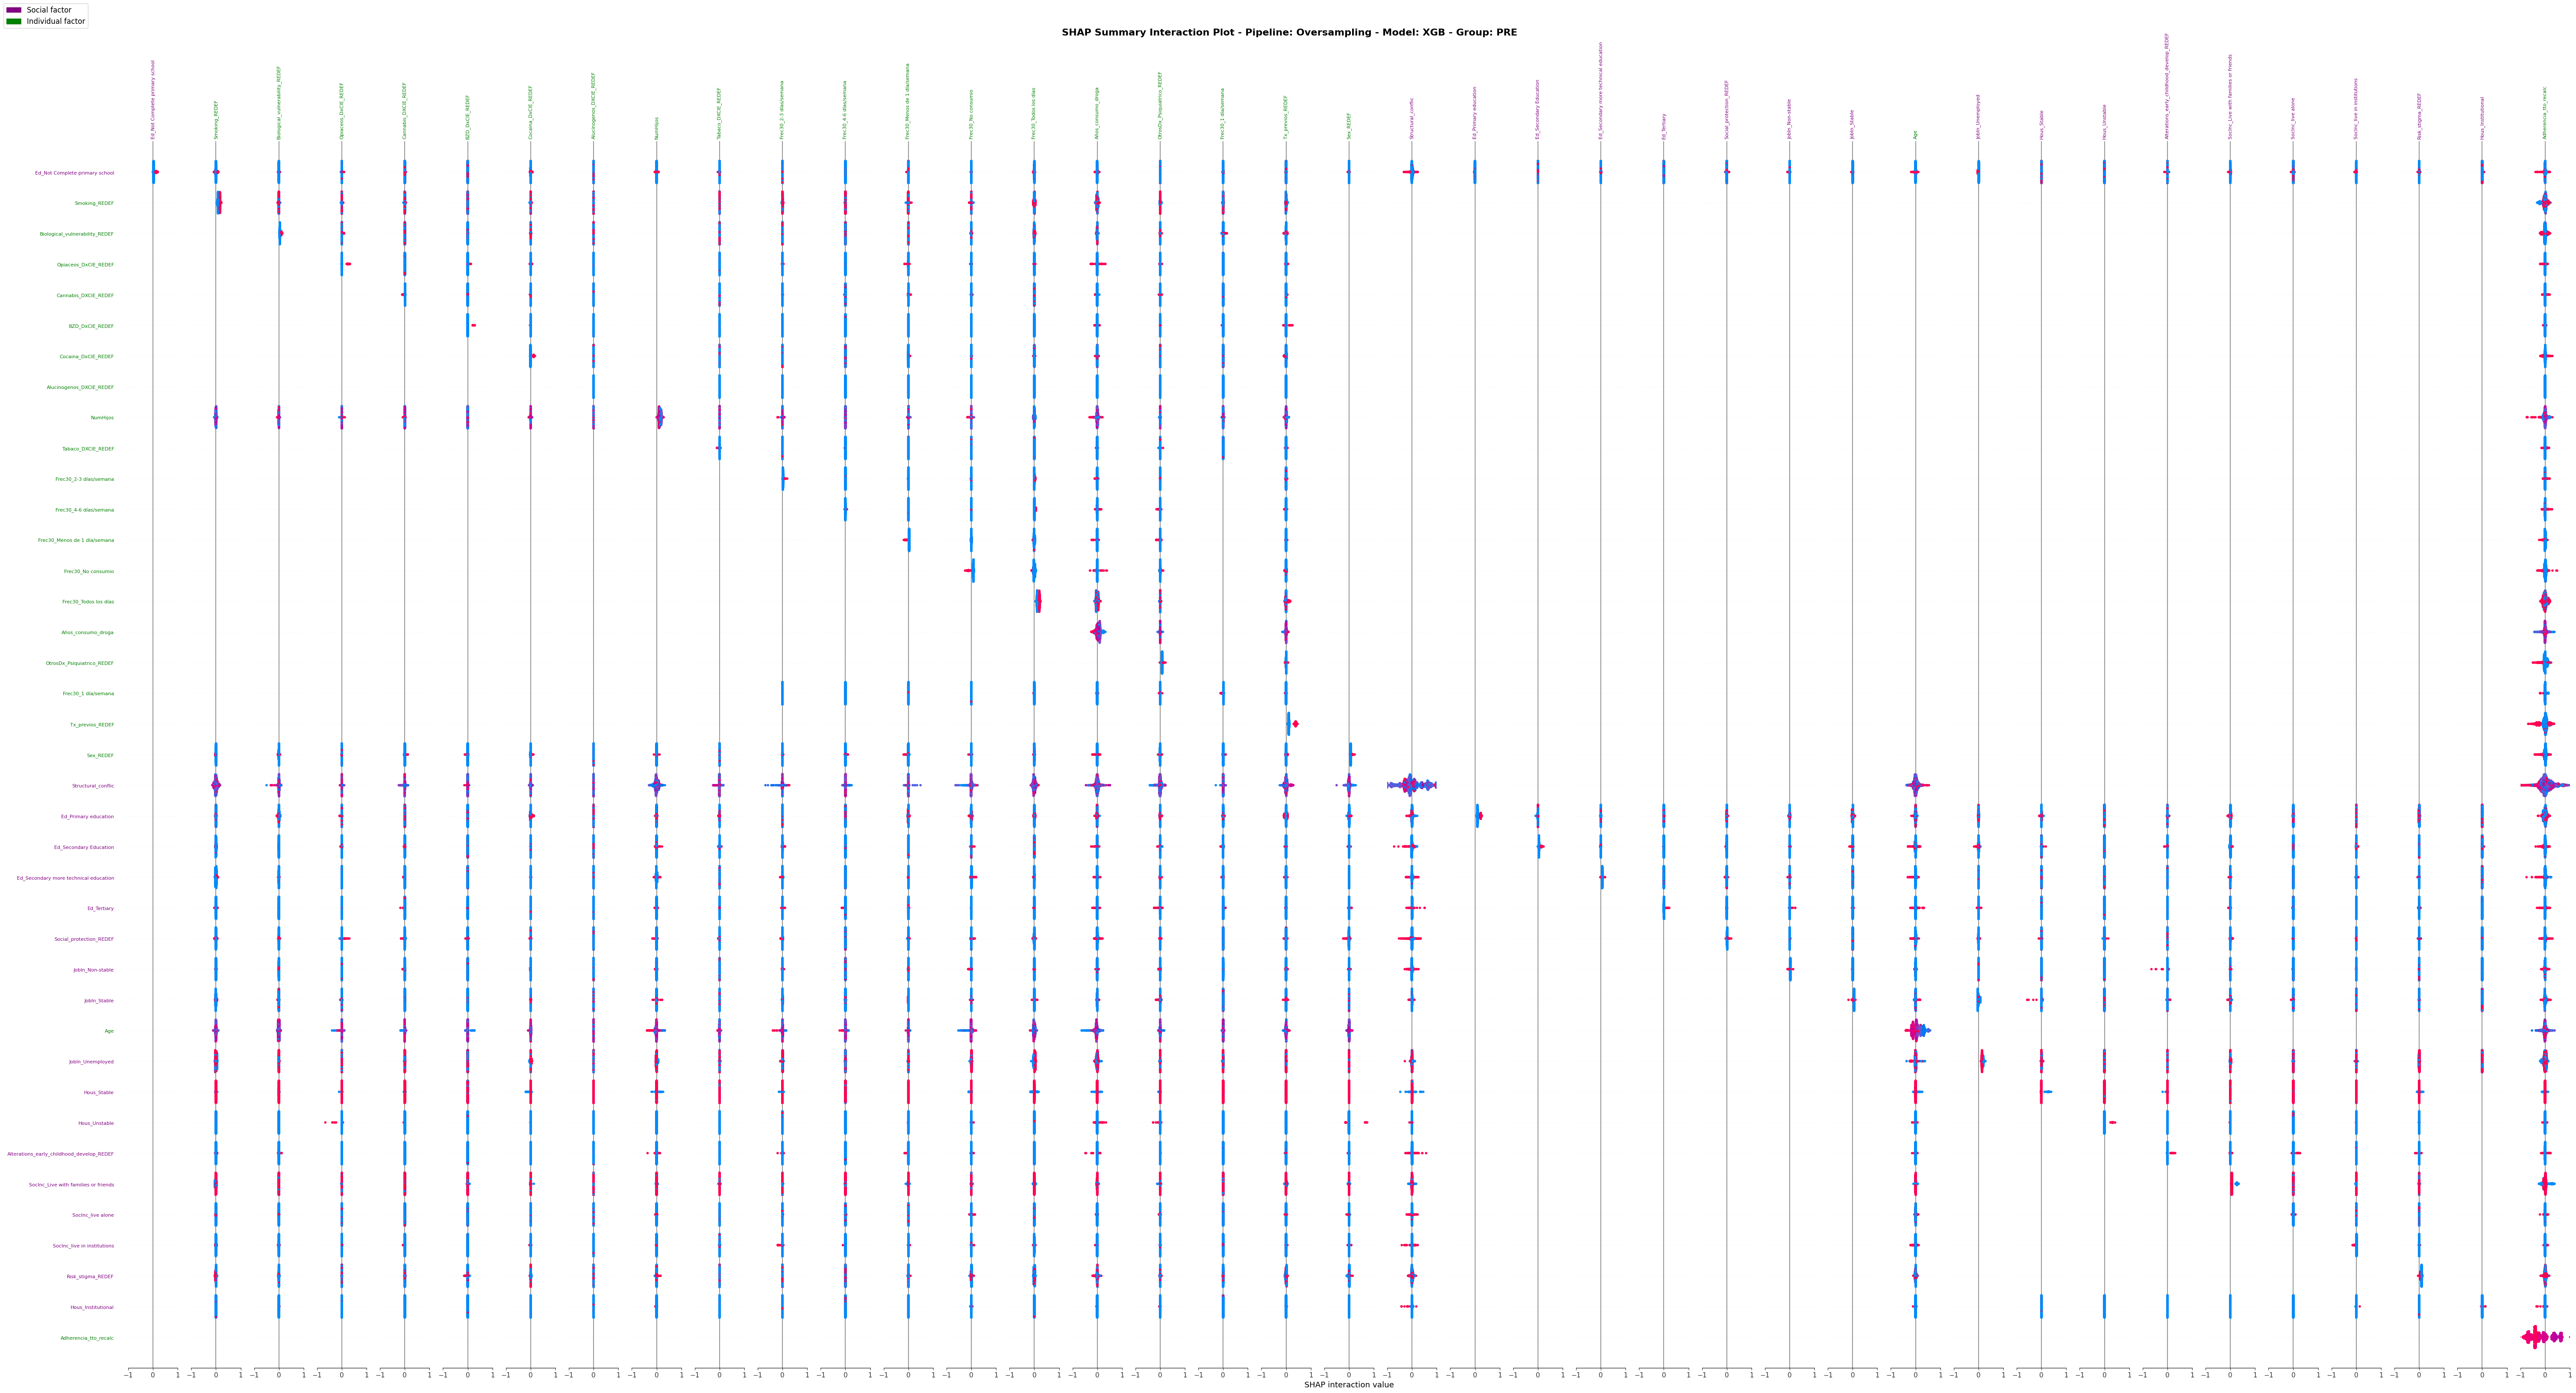

In [121]:
# PRE
group = 'pre'
X_test = data_dic['X_test_' + group]
y_test = data_dic['y_test_' + group]
model_name = model_choices[method_name]

shap_inter_vals = np.load(f'./output/shap_inter_values/{group}_{method_name}.npy')
# # Set the upper triangle of each instance's feature interaction matrix to NaN
# for i in range(shap_inter_vals.shape[0]):
#     for j in range(shap_inter_vals[i].shape[0]):
#         for k in range(j + 1, shap_inter_vals[i].shape[1]):
#             shap_inter_vals[i][j][k] = np.nan  # Set upper triangle to NaN

shap.summary_plot(shap_inter_vals, X_test, max_display=39, show=False)
fig=plt.gcf()
attr_names = []
# Iterate over all axes in the figure
for ax in fig.get_axes():
    # Customize the y-axis tick labels
    for label in ax.get_yticklabels():
        label_text = label.get_text()  # Get the text of the label
        attr_names.append(label_text)
        label.set_fontsize(8)
        if label_text in soc_var_names:
                label.set_color('purple')
        else:
                label.set_color('green')

# Assuming the top labels are treated as titles, let's try to modify them
total_axes = len(fig.axes)
for i, ax in enumerate(fig.axes):
        reverse_index = total_axes - 1 - i
        title = attr_names[reverse_index]
        ax.set_title(title, color='purple' if title in soc_var_names else 'green', fontsize=8, rotation=90)
        ax.set_xlim([-1,1])

# Create a single general legend for the whole figure
handles = [mpatches.Patch(color=color, label=label) for color, label in used_colors.items()]
fig.legend(handles=handles, loc='upper left', fontsize=12)

plt.suptitle('SHAP Summary Interaction Plot - Pipeline: Oversampling - Model: XGB - Group: PRE\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()